# Gaussian Mixture and DBSCAN Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal 

from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## Hierarchical Clustering | DBSCAN

In [lab1 - Exercise 4](https://github.ubc.ca/MDS-2018-19/DSCI_563_unsup-learn_students/blob/master/release/lab1/lab1.ipynb), we verified that the K-Means has limitations on handling non-spherical clusters because the Euclidean distance attributes the same importance in all directions. In this part, we are going to compare the K-Means behaviour with other cluster techniques.

1. Apply the Single Linkage with the Euclidean distance;
2. Apply the Average Linkage with the Euclidean distance;

Make the plot of the clusters for each method (side-by-side). Intuitively, why the single linkage and average linkage obtain different results in this problem? (From `scipy.cluster.hierarchy` use `linkage`, `fcluster`, and `dendrogram`).

In [2]:
my_data = np.zeros((200,2))
my_data[0:100,0] = np.random.uniform(0,5,size=100)
my_data[0:100,1] = 0.4*my_data[0:100,0]+np.random.normal(scale=.1,size=100)
my_data[100:200,0] = np.random.uniform(0,5,size=100)
my_data[100:200,1] = 0.4*my_data[100:200,0]+np.random.normal(scale=.075,size=100)+1

# ------------------ ## ----------------- ## ------------

# Fill in your code here

### Exercise 1.1 Solution
------------------------------------------

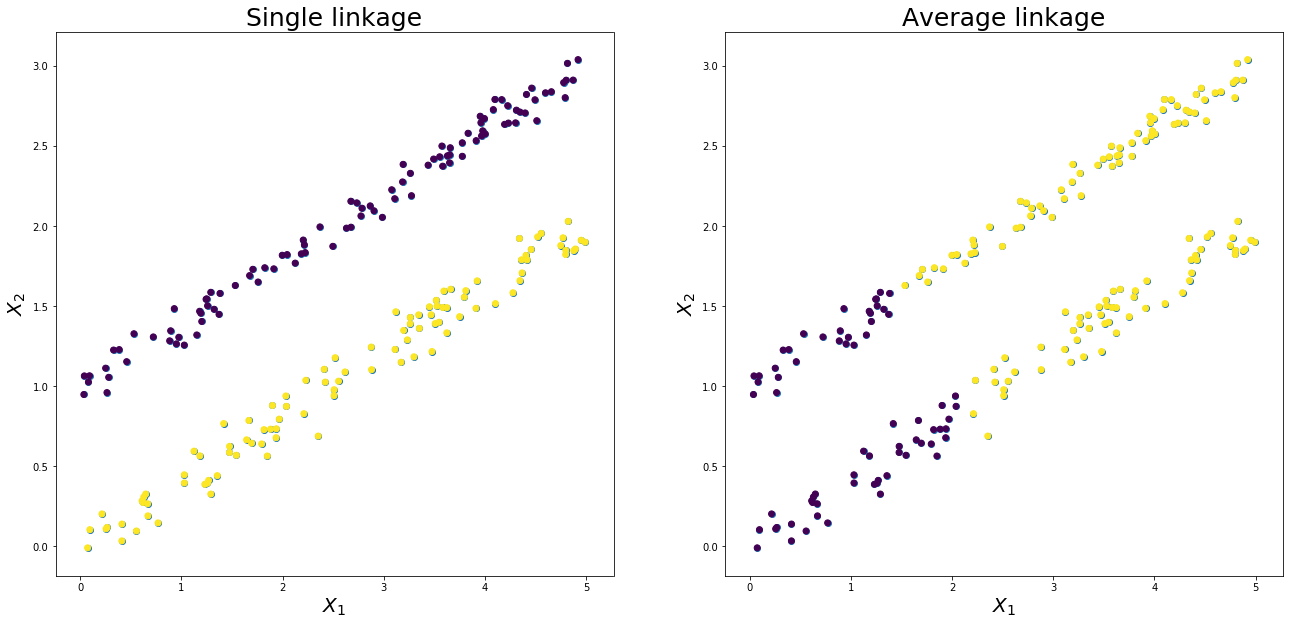

In [3]:
single_link = linkage(my_data)

avg_link = linkage(my_data, method='average')

# Plotting the points
fig, ax = plt.subplots(1,2, figsize=(22,10))
ax[0].scatter(my_data[:,0],my_data[:,1])
ax[0].scatter(my_data[:,0],my_data[:,1], c=fcluster(single_link, 2, criterion='maxclust'));
ax[0].set_title("Single linkage", fontsize=25)
ax[0].set_xlabel("$X_1$", fontsize=20)
ax[0].set_ylabel("$X_2$", fontsize=20)
ax[1].scatter(my_data[:,0],my_data[:,1])
ax[1].scatter(my_data[:,0],my_data[:,1], c=fcluster(avg_link, 2, criterion='maxclust'));
ax[1].set_title("Average linkage", fontsize=25);
ax[1].set_xlabel("$X_1$", fontsize=20);
ax[1].set_ylabel("$X_2$", fontsize=20);

The single linkage has the ability to strech the cluster shape as it only looks to the minimum distance. The average linkage, on the other hand, looks at the average of distance. Consequently, as the shape of the cluster starts getting longer, the distances along the lines get higher than the distances between the lines (in average).

Apply the average linkage again, but this time use the "Mahalanobis" distance;
Make the plot of the clusters. Does this result surprise you? How can you explain this difference?

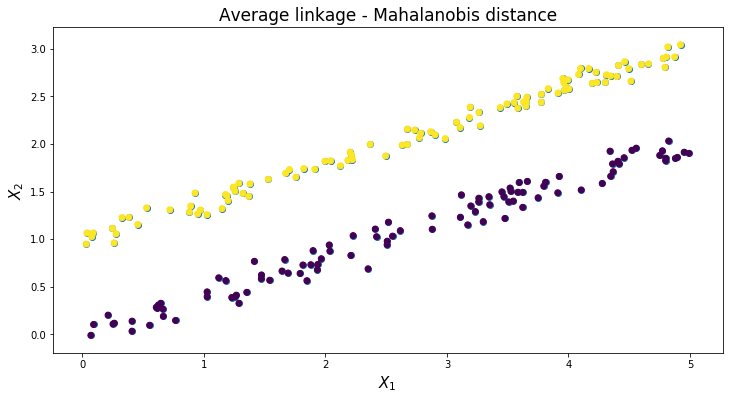

In [4]:
avg_link_mahalanobis = linkage(my_data, method='average', metric='mahalanobis')

# Plotting the points
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(my_data[:,0],my_data[:,1])
ax.scatter(my_data[:,0],my_data[:,1], c=fcluster(avg_link_mahalanobis, 2, criterion='maxclust'));
ax.set_title("Average linkage - Mahalanobis distance", fontsize=17)
ax.set_xlabel("$X_1$", fontsize=15)
ax.set_ylabel("$X_2$", fontsize=15);

By using the Mahalanobis distance, we account for the different variability and correlation of the variables. In this way, the separation of the points along the lines will count much less for the distance measure than a "vertical" separation, for example. This is an example on how different distances metrics can hugely impact your solutions.

Plot the dendrogram of the last 10 merged clusters of a linkage (any linkage). What does the length of the branches in a dendrogram mean (e.g., there's a long branch before a merge occurs - what does it mean?)? 

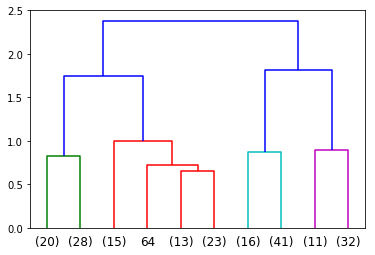

In [5]:
dendrogram(avg_link_mahalanobis, 10, truncate_mode='lastp');

A long branch in the dendrogram before a merge means that the clusters being merged are faraway from each other (we might be merging clusters that are too different to be merged).

I know you are thinking "I don't want to learn any other algorithm, I will just change the distance metric in the average linkage and I'll be good!". Well, would that work? Using the sample `x_moons` (below) and assuming two clusters:

1. Use Average Linkage with Euclidean distance;
2. Use Average Linkage with Mahalanobis distance;

Changing the distance helped in this case? Now try:

3. [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN);
4. Single Linkage;

Plot all your results.

In [6]:
x_moons = make_moons(100,noise=.07)[0]

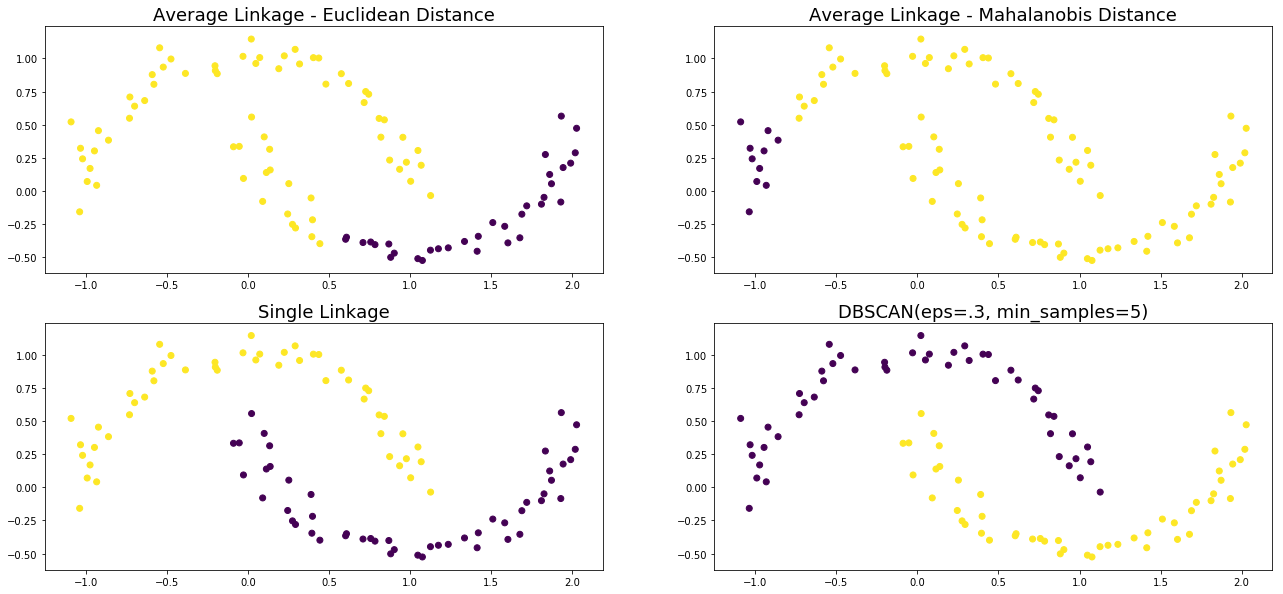

In [8]:
single = linkage(x_moons)
avg_euc = linkage(x_moons, method='average')
avg_maha = linkage(x_moons, method='average', metric='mahalanobis')
db = DBSCAN(eps=.3)
db.fit(x_moons)
fig, ax = plt.subplots(2,2, figsize=(22,10))
ax[0,0].scatter(x_moons[:,0], x_moons[:,1], c=fcluster(avg_euc,2,criterion='maxclust'))
ax[0,0].set_title("Average Linkage - Euclidean Distance", fontsize=18)
ax[0,1].scatter(x_moons[:,0], x_moons[:,1], c=fcluster(avg_maha,2,criterion='maxclust'))
ax[0,1].set_title("Average Linkage - Mahalanobis Distance", fontsize=18)
ax[1,0].scatter(x_moons[:,0], x_moons[:,1], c=fcluster(single,2,criterion='maxclust'))
ax[1,0].set_title("Single Linkage", fontsize=18)
ax[1,1].scatter(x_moons[:,0], x_moons[:,1], c=db.labels_)
ax[1,1].set_title("DBSCAN(eps=.3, min_samples=5)", fontsize=18);

No, just changing the distance metric here isn't helpful. The non-convexity of the regions makes it harder to properly group points in their respective curves.

What are the roles of the parameters in the DBSCAN? What do you expect to happen if you increase `eps`? And if you drastically reduce `eps`? What about `min_samples` (if you increase and reduce)?

Load the data UN votes in the `data/subvotes.csv` file. Considering only the countries that missed less than 15 votes, use DBSCAN to cluster the countries. You will need to tune the `eps` parameter. Comment your results.

In [9]:
source_data = pd.read_csv("data/subvotes.csv") # Read the data
votes = source_data.pivot(index='country',columns='rcid') # Spread the data from long table to wide
votes = votes[np.sum(np.isnan(votes),axis=1)<15] # get the countries that didn't miss 10 or more votes
votes = votes.dropna(axis=1)


for eps in range(1,10):
    db = DBSCAN(eps=eps)
    db.fit(votes)
    clusters_labels = np.unique(db.labels_)
    clusters = {}
    print(f"\n\nDBSCAN(eps = {eps}) - Cluster division:")
    print("-----------------------------------\n")
    for i in range(0,clusters_labels.shape[0]):
        clusters[str(clusters_labels[i])] = list(votes[db.labels_== clusters_labels[i]].index)
        print(f"Cluster {str(clusters_labels[i])}: {clusters[str(clusters_labels[i])]}\n")



DBSCAN(eps = 1) - Cluster division:
-----------------------------------

Cluster -1: ['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Denmark', 'Ecuador', 'Egypt', 'Finland', 'France', 'Greece', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Libya', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Russian Federation', 'Singapore', 'Spain', 'Sri Lanka', 'Sudan', 'Sweden', 'Syrian Arab Republic', 'Thailand', 'Togo', 'Trinidad and Tobago', 'UK', 'USA', 'Ukraine', 'Uruguay', 'Venezuela']



DBSCAN(eps = 2) - Cluster division:
-----------------------------------

Cluster -1: ['Algeria', 'Argentina', 'Australia', 'Austria', 'Baham

For eps $\leq$ 2 all the countries are considered noise and we have no clusters. For $3\leq \text{eps}\leq 4$, we still have a large portion of the countries being considered noise, but the clusters start coming up. Interesting results are obtained for  $\text{eps}\in\{5,6,7\}$. eps = 5 provides the highest cluster number, 3. For eps = 6 and 7 we have two cluster, but just a few countries are left as noise. For $\text{eps}\in\{8,9\}$ the clusters are merged into a single cluster and we lose the  ability to distinguish the countries according to their votes.

## EM algorithm and Mixture models

In this part, you'll be using the EM algorithm to perform model-based clustering using the data in `data.csv`.


Implement one iteration of the EM algorithm "from scratch".

To make things easier, we will consider uncorrelated Gaussians, with bivariate density
$$ \displaystyle p(x,y) = \frac{1}{2\pi \sigma_x\sigma_y} \exp\left( -\frac{(x-\mu_x)^2}{2\sigma_x^2} - \frac{(y-\mu_y)^2}{2\sigma_y^2} \right) $$
(note that here, $\pi=3.14159\ldots$, not the mixture probabilities).
You are to fit three clusters. Suppose you have estimates:

- $\mu_1 = (-10, -8)$: mean of cluster 1
- $\sigma^2_1 = (3, 2)$: variances of cluster 1
- $\mu_2 = (12, -4)$: mean of cluster 2
- $\sigma^2_2 = (4, 2.5)$: variances of cluster 2
- $\mu_3 = (4, 18)$: mean of cluster 3
- $\sigma^2_3 = (42, 8.5)$: : variances of cluster 3
- $\phi = (0.4, 0.2, 0.4)$ # Mixture probabilities.


Hint: if it's helpful, you may follow [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf) Algorithm 8.1, page 275. But this assumes 2 clusters and needs to be extended to 3. 

- Compute the responsibilities. That is, for each observation, compute the probability of belonging to each cluster.  This is called the _expectation step_. (Hint: The function `scipy.stats.multivariate_normal` can be helpful)
- Update the parameter estimates using these new responsibilities. This is called the _maximization step_. Report the estimates. 

In [12]:
x = pd.read_csv("data/data.csv")
k = 3
mu_initial = np.array([[-10, -8],
                        [12, -4],
                        [4, 18]])

var_initial = np.array([[3, 2],
                        [4, 2.5],
                        [42,8.5]])

phi = np.array([0.4, 0.2, 0.4])

# Fill in your code here.

In [17]:
k = 3
mu_initial = np.array([[-10, -8],
                        [12, -4],
                        [4, 18]])

var_initial = np.array([[3, 2],
                        [4, 2.5],
                        [42,8.5]])

phi = np.array([0.4, 0.2, 0.4])

# E-step: assignments
components_density = np.zeros((x.shape[0],k))
for i in range(0,k):
    components_density[:,i] = multivariate_normal.pdf(x, mean = mu_initial[i,:], cov = np.diag(var_initial[i,:]))

mixture_density = np.sum(phi * components_density,axis=1)
r = components_density * phi
r = (r.T/mixture_density).T

# M-step:
phi_updated = np.mean(r,axis=0)
mu_updated = np.sum(r[:,None,:]*x.values[:,:,None],axis=0)/np.sum(r[:,:],axis=0)[None,:]
mu_updated = mu_updated.T
var_updated = np.sum(r[:,None,:]*(x.values[:,:,None]-mu_updated.T[None,:,:])**2,axis=0)/np.sum(r[:,:],axis=0)[None,:]
var_updated = var_updated.T

print(mu_updated)

[[-10.15784653  -8.04251863]
 [ 11.8347069   -3.57465036]
 [  3.66023798  18.45624633]]


How are the responsibilities different (in meaning) from the cluster probabilities ($\phi$)? 

The resposibility $r_{ij}$ is the probablity that observation $i$ belongs to cluster $j$ -- so, it is a __conditional__ probability (given observation $i$). Remember that in the E-step we are calculating a conditional probability. 
The cluster probability $\phi_j$ is the probablity that a randomly chosen observation belongs to cluster $j$ -- so, the data point has not been observed/realized yet.

Derive the formula for the responsibility estimates in Exercise 2.1 given the parameters $\{\phi_j\},\{\mu_j\},\{\sigma_j\}$.


Consider $k$ clusters. Let $\delta_{ij}$ be the indicator function that equals 1 when observation $i$ belongs to group $j$ (i.e. when $z_i=j$, in the notation from lecture). Then $r_{ij}$ is the probability of the $i$'th observation belonging to cluster $j$ -- a conditional probability, having realized the random variable $X_i$ as taking the value $x_i$: 
$$ r_{ij} = P\left(\delta_{ic} = 1 \mid X_i = x_i\right). $$

Using Bayes' Theorem,
$$ r_{ij} = \frac{P\left(\delta_{ic} = 1\right) f_{X|\delta}\left(X_i = x_i | \delta_{ic} = 1\right)}{f_X\left(x_i\right)}. $$
But $f_{X|\delta}\left(X_i = x_i | \delta_{ic} = 1\right)$ is just the $k$th cluster density (which we will denote $g_j(x_i)$ -- a Gaussian density), and $P(\delta_{ij} = 1)$ is just the mixing probability $\phi_j$. The full density $f_X(x_i)$ of the data can be found by the law of total probability:
$$ f_X\left(x_i\right) = \sum_{j=1}^k f_{X|\delta}\left(x_i \mid \delta_{ij} = 1\right) P\left(\delta_{ij}=1\right) = \sum_{j=1}^k \phi_j g_j\left(x_i\right). $$
Plugging these into the above formula for $r_{ij}$, we obtain the desired formula,
$$ r_{ij} = \frac{\phi_j g_j\left(x_i\right)}{\sum_{j=1}^k g_j\left(x_i\right) \phi_j}. $$

Suppose your results from Exercise 2.1 are the last step of the EM algorithm. Based on these estimates:

- Assign clusters to the data, and plot the clusters using different colours. Behind the scatterplot, plot the mixture density. (Hint: see [plt.contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour) and an [example](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html)
- Compute the AIC. Does this AIC value alone tell us anything about the goodness of the model? Why or why not? How might the AIC be used to select $k$?

In [ ]:
# Getting the labels
labels_ = np.argmax(r, axis=1)

# Let's create a function to obtain the value of the mixture density;
def mixture_density(x_values, k, phi, mu, cov):
    components_density = np.zeros((x_values.shape[0],k))
    for i in range(0,k):
        components_density[:,i] = multivariate_normal.pdf(x_values, mean = mu[i,:], cov = cov[i])

    mixture_density = np.sum(phi * components_density,axis=1)
    return mixture_density

# Plot the contour lines of the mixture density
plt.figure(figsize=(10,10))
plt.scatter(x.values[:, 0], x.values[:, 1], c = labels_, alpha=.45)
plt.scatter(mu_updated[:,0], mu_updated[:,1], marker='*',s=400, c=[0,1,2], edgecolor='black', zorder=10)
X = np.linspace(np.min(x.values[:,0])-2, np.max(x.values[:,0])+2)
Y = np.linspace(np.min(x.values[:,1])-2, np.max(x.values[:,1])+2)
X, Y = np.meshgrid(X, Y)
XX = np.array([X.ravel(), Y.ravel()]).T

# Just transforming the var_updated into matrix format
var_matrices = np.zeros((3,2,2))
for i in range(0,3):
    var_matrices[i] = np.diag(var_updated[i])

# Getting the values of the mixture
Z = mixture_density(XX, k, phi_updated, mu_updated, var_matrices)
Z = Z.reshape(X.shape)

# Plotting the contour lines
plt.contour(X, Y, Z, levels=15)
plt.colorbar(shrink=0.8, extend='both');


## The code below is an additional plot to help you visualize the mixture density.
# Just remove the comments.

#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize=(22,10))
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X, Y, Z)

For the AIC we need to first count the number of parameters:
- 2 parameters in each of the covariance matrix - 6 total;
- 2 parameters for each mean vector - 6 total;
- 2 parameters in the $\phi$ vector;

Therefore we have 14 parameters;

In [ ]:
AIC = 2*14-2*np.sum(np.log(mixture_density(x, k, phi_updated, mu_updated, var_matrices)))
print(f"AIC = {np.round(AIC,4)}")

The Akaike information criterion (AIC) is a measure of the relative quality of statistical models for a given
set of data. It cannot tell anything about the goodness of the model in an absolute sense. However, AIC
can help comparing models with different k; the lower AIC the better. We could choose the k that gives the
lowest AIC.

In this exercise, you'll be running Gaussian mixture models with the EM algorithm from start to finish.

1. What is needed to start the algorithm? How might you obtain these starting values? (There are many answers here -- choose one. No need to compute these starting values, just explain.)
2. Run the EM algorithm. Use [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture);
3. How many clusters were chosen here? (Try at least 1 through 9 clusters).
4. Assign clusters to the data, and plot the clusters using different colours. Behind the scatterplot, plot the mixture density.

#### Item 1:
There are several ways one can start the EM algorithm. We can randomly assign each observation to a cluster (hence, starting with estimates of the responsibilities). Another way is to choose estimates of the mean (by some method such as $k$-means), and choose a value for the covariance matrix (such as the identity matrix) -- hence, starting with estimates of the _model_ parameters).

#### Item 2:

In [ ]:
max_k = 15
GM = [GaussianMixture(n_components=k, n_init=10).fit(x) for k in range(1,max_k)]
AIC = [GM[k-1].aic(x) for k in range(1,max_k)]
BIC = [GM[k-1].bic(x) for k in range(1,max_k)]

plt.plot(range(1,max_k), AIC, label="AIC")
plt.axvline(x=np.argmin(AIC)+1, linestyle='-.', label='AIC min')

plt.plot(range(1,max_k), BIC, label="BIC")
plt.axvline(x=np.argmin(BIC)+1, linestyle='-.', label="BIC min", color = "orange")
plt.legend();

#### Item 3:

According to both, AIC and BIC, the best number of cluster is 4.

#### Item 4:

In [ ]:
best_GM = GM[3]

colors = np.array(["blue", "black", "purple", "green"])
plt.figure(figsize=(16,8))
plt.scatter(x.values[:,0], x.values[:,1], color = colors[best_GM.predict(x)], alpha=.2);
plt.scatter(best_GM.means_[:,0], best_GM.means_[:,1], color=colors, s=200, marker='*', edgecolor='black', zorder=10);

# Re-using some of the variable of 2.4
Z = mixture_density(XX, 4, best_GM.weights_, best_GM.means_, best_GM.covariances_)
Z = Z.reshape(X.shape)

# Plotting the contour lines
plt.contour(X, Y, Z, levels=8)
plt.colorbar(shrink=0.8, extend='both');

## Pondering Gaussian mixture models (GMMs)

What are some advantages and disadvantages of GMM vs. $k$-means clustering?

Advantage of GMM: more flexible, for example can learn clusters of different sizes. Also returns richer information like responsibilities, includes $k$-means as limit case, and you can use the likelihood function for things like AIC. Advantage of $k$-means: simpler, likely faster to fit, straightforward to interpret.

How the choice of $k$ in clustering relates to the fundamental tradeoff of ML. When doing unsupervised learning, what does the fundamental tradeoff mean to you?

A larger $k$ tends more towards overfitting. For example having each point be its own cluster does not seem sensible. Put another way, a larger $k$ corresponds to a more complicated model of the data (more parameters). The fundamental tradeoff still makes sense but we don't always have such a clean measure of things like training error and test error. We do have proxies like the log likelihood for the GMM though.

What is the purpose of the EM algorithm when applied to GMMs? In other words, what problem does it solve?

The purpose of EM is the maximize the likelihood. In other words, it is helping us solve an optimization problem. It does so in an alternating fashion, first optimizing the cluster assignments or responsibilities, then the model parameters, and then the assignments again, etc. 

What does it mean for a clustering method to be robust to outliers? Is GMM clustering robust to outliers? What about $k$-means? Is there hope?

One definition is how much an outlier can effect the output of a clustering method. For example, if we move one data point really far away, what does that do? $k$-means
 and GMM are both related to Euclidean distances, and so they are not robust to outliers. For example, one faraway point might (erronously) shift its cluster mean very far off course. This is much like the mean/SD not being robust, or least squares linear regression not being robust. In DSCI 575 we will explain a precise relationship between the Gaussian assumption in GMM and the squared error used in least squares and $k$-means. But, yes, there is hope. Just like the median is more robust than the mean, a method like $k$-medoids should be more robust to outliers than $k$-means.